## Ex 3.8

This question involves the use of simple linear regression on the Auto data set.

* (a) Use the lm() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summary() function to print the results. Comment on the output. For example:
    * i. Is there a relationship between the predictor and the re- sponse?
    * ii. How strong is the relationship between the predictor and the response?
    * iii. Is the relationship between the predictor and the response positive or negative?
    * iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?
* (b) Plot the response and the predictor. Use the abline() function to display the least squares regression line.
* (c) Use the plot() function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

In [5]:
Auto<-read.csv("../data/Auto.csv", header=T, na.strings="?")
#or require(ISLR) ; data(Auto)
str(Auto)

'data.frame':	397 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : int  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ name        : Factor w/ 304 levels "amc ambassador brougham",..: 49 36 231 14 161 141 54 223 241 2 ...


#### 3.8.a

In [20]:
lmfit1<-lm(mpg~horsepower,data=Auto)
summary(lmfit1)


Call:
lm(formula = mpg ~ horsepower, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


**i. is there a relation?**  We see a low p-value for predictor's coefficient so there is a relationship

**ii. how strong is relationship?**

In [12]:
#find percentage error  RSE / response's mean
paste("percentage error: ", summary(lmfit1)$sigma / mean(Auto$mpg) * 100 )

[1] "percentage error:  0.209237140669148"

 Percentage error is about 20% and $R^2=60%$ of a variance of mpg is explained by the horsepower.

**iii. positive or negative relationship between response and predictor?** Coefficient is negative. So the relationshipo is negative

**iv. predicted mpg for horsepower =98**

In [18]:
predict( lmfit1, data.frame(horsepower=98), interval="confidence" )
predict( lmfit1, data.frame(horsepower=98), interval="prediction" )

,fit,lwr,upr
1,24.46708,23.97308,24.96108


,fit,lwr,upr
1,24.46708,14.8094,34.12476


#### 3.8.b

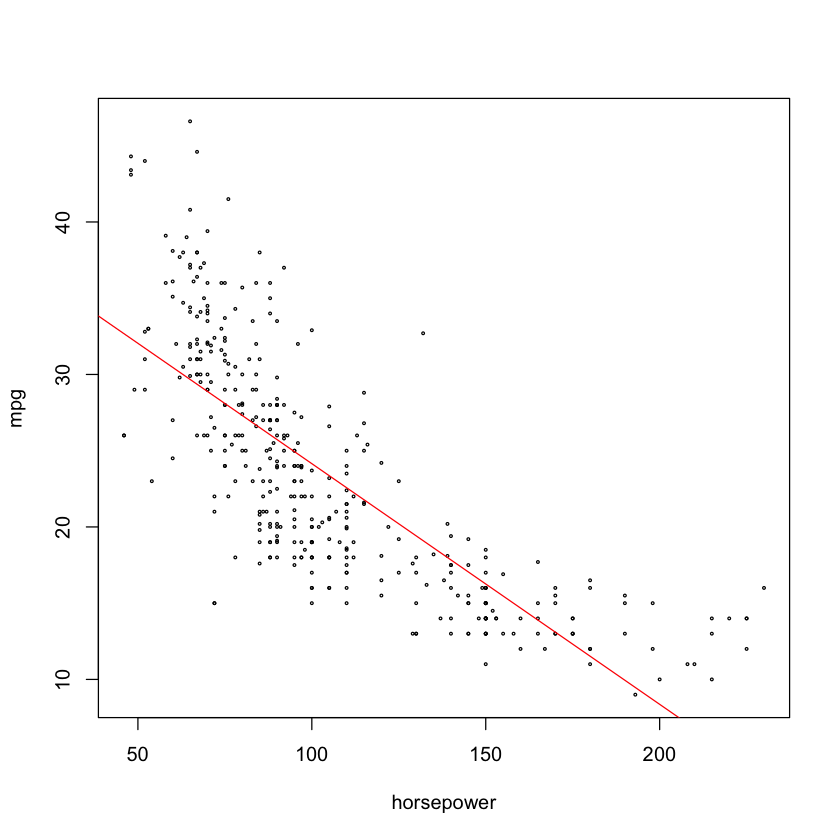

In [21]:
plot(mpg~horsepower,data=Auto, cex=0.3)
abline(lmfit1, col=2)

#### 3.8.c

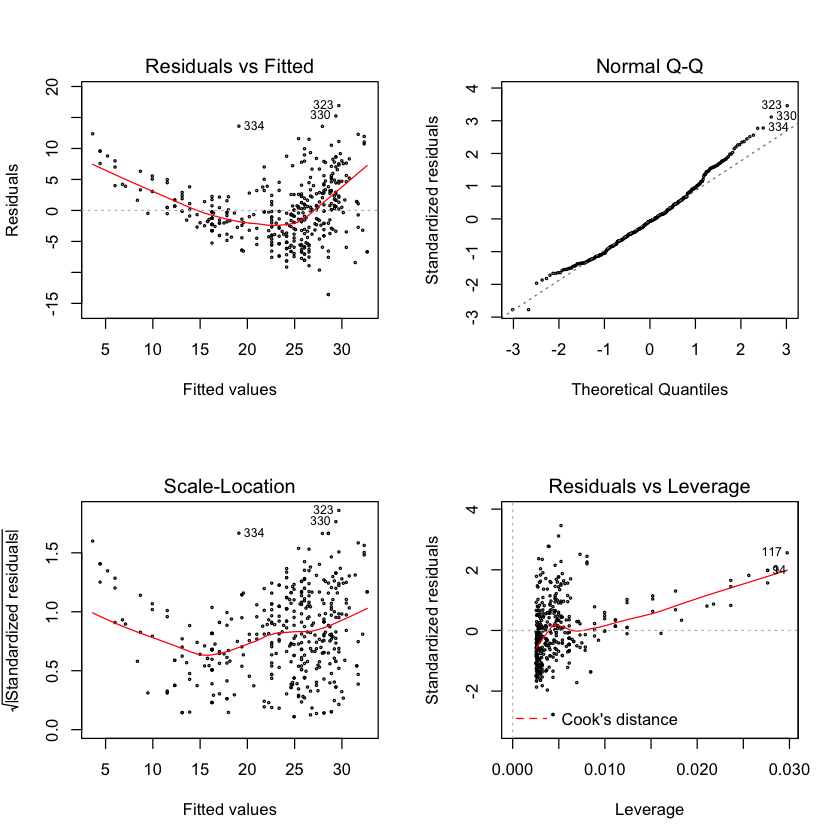

In [23]:
par(mfrow=c(2,2))
plot(lmfit1, cex=0.3)

**residuals plots**  reveal some non-linearity between  the horsepower predictor and the response

## Ex 3.9

This question involves the use of multiple linear regression on the Auto data set.

* (a) Produce a scatterplot matrix which includes all of the variables in the data set.
* (b) Compute the matrix of correlations between the variables using the function cor(). You will need to exclude the name variable, which is qualitative.
* (c) Use the lm() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results. Comment on the output. For instance:
    * i. Is there a relationship between the predictors and the re- sponse?
    * ii. Which predictors appear to have a statistically significant relationship to the response?
    * iii. What does the coefficient for the year variable suggest?
* (d) Use the plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?
* (e) Use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?
* (f) Try a few different transformations of the variables, such as log(X), √X, X2. Comment on your findings.


In [1]:
Auto<-read.csv("../data/Auto.csv", header=T, na.strings="?")
str(Auto)

'data.frame':	397 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : int  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ name        : Factor w/ 304 levels "amc ambassador brougham",..: 49 36 231 14 161 141 54 223 241 2 ...


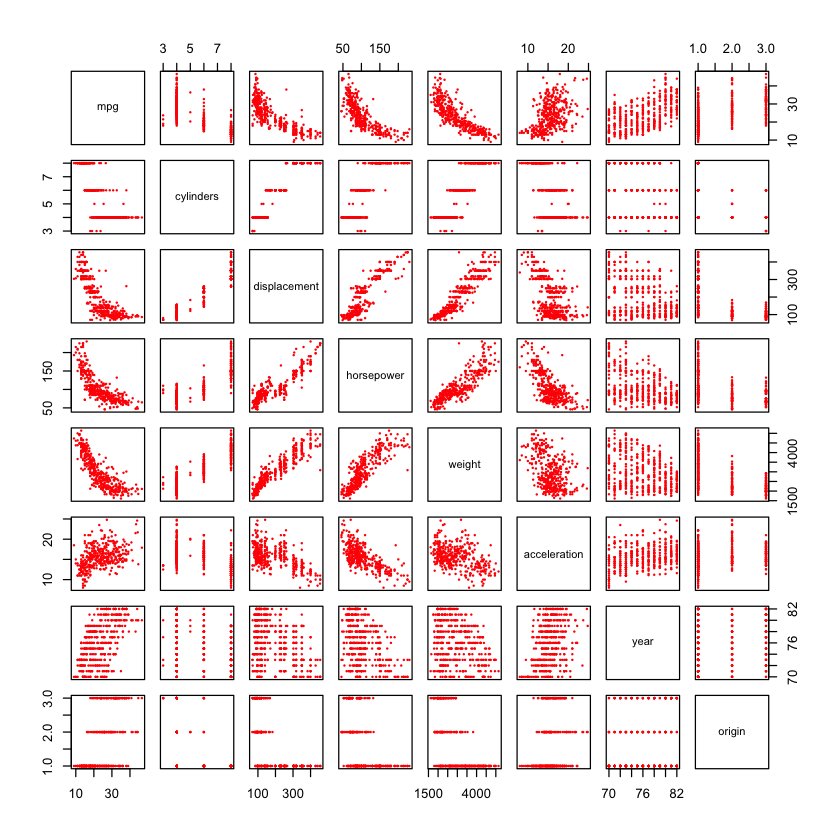

In [3]:
#9.(a)
pairs(Auto[,1:8], cex=0.2, col='red')

In [9]:
#9.(b)
cor(Auto[,1:8], use="complete.obs")

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000


In [12]:
#9.(c)
lmfit2<- lm(mpg~.-name, data=Auto)
summary(lmfit2)


Call:
lm(formula = mpg ~ . - name, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
horsepower    -0.016951   0.013787  -1.230  0.21963    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
acceleration   0.080576   0.098845   0.815  0.41548    
year           0.750773   0.050973  14.729  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.328 on 384 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,  p-value: < 2.2e-16


In [14]:
#percentage error 
summary(lmfit2)$sigma  / mean(Auto$mpg)

[1] 0.1415079

* **9.c.i** F-Statistics is high and p-value is low, so there is  a relation between mpg and all quantitative predictors. $R^2 = 0.82$ i.e. 82% of mpg variance is explained  by predictors 
* **9.c.ii** based on p-values  acceleration,cylinders,horsepower do not have significant relationship.   displacement, weight, year, origin do 
* **9.c.iii** Coefficient for year is positive  i.e. newer cars have a higher mileage per galon.

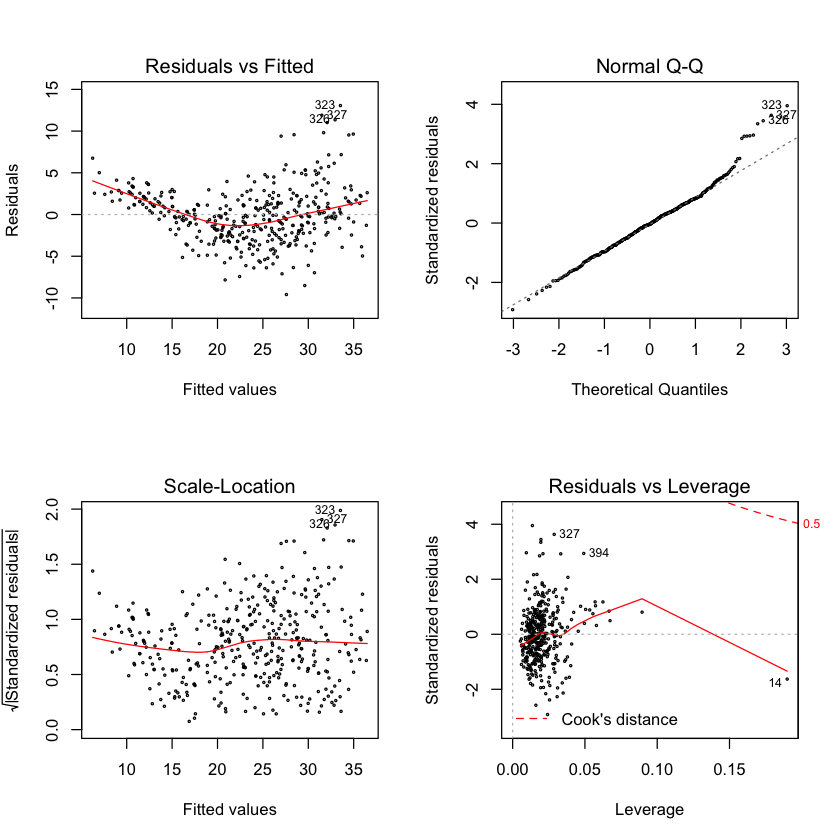

In [15]:
#9.d()
par(mfrow=c(2,2))
plot(lmfit2, cex=0.3)

**9.(d)**  Residuals plot shows some non-linearity in the relationship, as well as a non-constant variance of error terms. 

On the residual plot 4 outliers are observed with values > 10 (** missed to plot studentized residuals**) 

on Residuals vs Leverage plot we observe one observation with hight leverage

In [35]:
#9.e
## correction. from correlation matrix pick the most correlated pairs
lmfit3<-lm(mpg~cylinders*displacement+displacement*weight,data = Auto)
summary(lmfit3)


Call:
lm(formula = mpg ~ cylinders * displacement + displacement * 
    weight, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.3564  -2.4882  -0.3635   1.8469  17.8176 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             5.285e+01  2.233e+00  23.673  < 2e-16 ***
cylinders               7.580e-01  7.645e-01   0.992    0.322    
displacement           -7.514e-02  1.669e-02  -4.502 8.90e-06 ***
weight                 -9.931e-03  1.323e-03  -7.505 4.19e-13 ***
cylinders:displacement -2.893e-03  3.424e-03  -0.845    0.399    
displacement:weight     2.147e-05  4.996e-06   4.298 2.18e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.115 on 391 degrees of freedom
Multiple R-squared:  0.7269,	Adjusted R-squared:  0.7234 
F-statistic: 208.2 on 5 and 391 DF,  p-value: < 2.2e-16


In [42]:
#9.f look pairs chart, observe that displacement + horsepower + weight + acceleration 
# are variables most suited for log, sqrt ..  transformations
lmfit4<- lm(mpg~horsepower+weight+acceleration, data=Auto)
summary(lmfit4)
#took off displacement, high p-value


Call:
lm(formula = mpg ~ horsepower + weight + acceleration, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.079  -2.736  -0.331   2.170  16.262 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  45.6782929  2.4085431  18.965  < 2e-16 ***
horsepower   -0.0474956  0.0159891  -2.970  0.00316 ** 
weight       -0.0057894  0.0005776 -10.024  < 2e-16 ***
acceleration -0.0020657  0.1233378  -0.017  0.98665    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.246 on 388 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.7064,	Adjusted R-squared:  0.7041 
F-statistic: 311.1 on 3 and 388 DF,  p-value: < 2.2e-16


In [44]:
##took off displacement
lmfit4b<- lm(mpg~log(weight) + sqrt(horsepower)+acceleration +I(acceleration^2), data=Auto)
summary(lmfit4b)


Call:
lm(formula = mpg ~ log(weight) + sqrt(horsepower) + acceleration + 
    I(acceleration^2), data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.2932  -2.5082  -0.2237   2.0237  15.7650 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       178.30303   10.80451  16.503  < 2e-16 ***
log(weight)       -14.74259    1.73994  -8.473 5.06e-16 ***
sqrt(horsepower)   -1.85192    0.36005  -5.144 4.29e-07 ***
acceleration       -2.19890    0.63903  -3.441 0.000643 ***
I(acceleration^2)   0.06139    0.01857   3.305 0.001037 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.99 on 387 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.7414,	Adjusted R-squared:  0.7387 
F-statistic: 277.3 on 4 and 387 DF,  p-value: < 2.2e-16


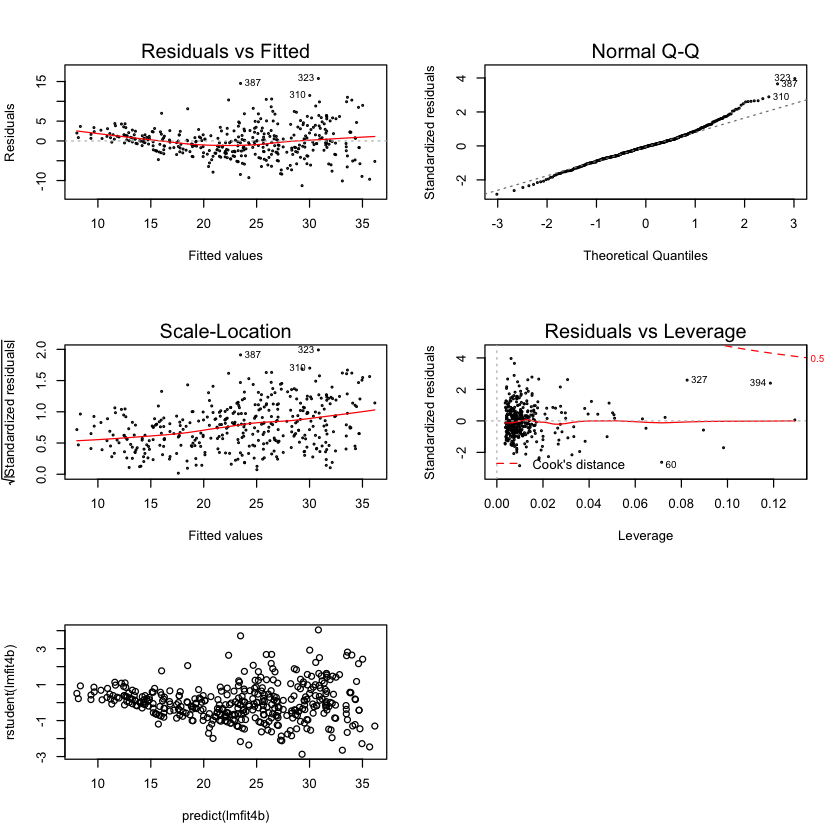

In [48]:
par(mfrow=c(3,2))
plot(lmfit4b, cex=0.3)
plot(predict(lmfit4b), rstudent(lmfit4b))

for lmfit4b the residuals plot shows less of a pattern, but qqplot shows some unnormality
If we look at pairs plt in 9.a  we observe that displacement, horsepoewr and wegith show a similar nonlinear pattern for mpg. So the next attempt is to try  to transpform the response log(mpg)

In [49]:
lmfit5<-lm(log(mpg)~cylinders+displacement+horsepower+weight+acceleration+year+origin,data=Auto)
summary(lmfit5)


Call:
lm(formula = log(mpg) ~ cylinders + displacement + horsepower + 
    weight + acceleration + year + origin, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.40955 -0.06533  0.00079  0.06785  0.33925 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.751e+00  1.662e-01  10.533  < 2e-16 ***
cylinders    -2.795e-02  1.157e-02  -2.415  0.01619 *  
displacement  6.362e-04  2.690e-04   2.365  0.01852 *  
horsepower   -1.475e-03  4.935e-04  -2.989  0.00298 ** 
weight       -2.551e-04  2.334e-05 -10.931  < 2e-16 ***
acceleration -1.348e-03  3.538e-03  -0.381  0.70339    
year          2.958e-02  1.824e-03  16.211  < 2e-16 ***
origin        4.071e-02  9.955e-03   4.089 5.28e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1191 on 384 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.8795,	Adjusted R-squared:  0.8773 
F-statistic: 400.4 

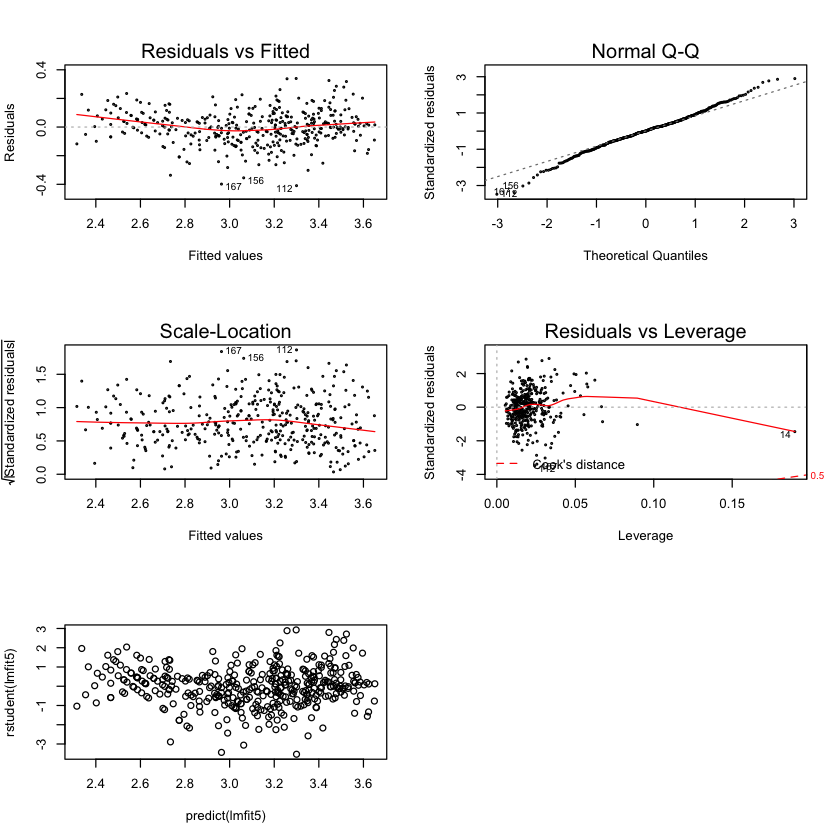

In [50]:
## we have  a higher R^2  the charts below shows a better model fit and no outliers
par(mfrow=c(3,2))
plot(lmfit5, cex=0.3)
plot(predict(lmfit5), rstudent(lmfit5))

### Ex 10.

This question should be answered using the Carseats data set.

* (a) Fit a multiple regression model to predict Sales using Price,Urban, and US.
* (b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!
* (c) Write out the model in equation form, being careful to handle the qualitative variables properly.
* (d) For which of the predictors can you reject the null hypothesis H0 :βj =0?
* (e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.
* (f) How well do the models in (a) and (e) fit the data?
* (g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).
* (h) Is there evidence of outliers or high leverage observations in the model from (e)?

In [3]:
library(ISLR)
data(Carseats)
str(Carseats)

'data.frame':	400 obs. of  11 variables:
 $ Sales      : num  9.5 11.22 10.06 7.4 4.15 ...
 $ CompPrice  : num  138 111 113 117 141 124 115 136 132 132 ...
 $ Income     : num  73 48 35 100 64 113 105 81 110 113 ...
 $ Advertising: num  11 16 10 4 3 13 0 15 0 0 ...
 $ Population : num  276 260 269 466 340 501 45 425 108 131 ...
 $ Price      : num  120 83 80 97 128 72 108 120 124 124 ...
 $ ShelveLoc  : Factor w/ 3 levels "Bad","Good","Medium": 1 2 3 3 1 1 3 2 3 3 ...
 $ Age        : num  42 65 59 55 38 78 71 67 76 76 ...
 $ Education  : num  17 10 12 14 13 16 15 10 10 17 ...
 $ Urban      : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 1 2 2 1 1 ...
 $ US         : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 2 1 2 1 2 ...


In [5]:
#10.a
# pairs(Carseats[,c(1,6,10,11)], cex=0.1)
lmfit101<-lm(Sales~Price+Urban+US, data=Carseats)
summary(lmfit101) 


Call:
lm(formula = Sales ~ Price + Urban + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9206 -1.6220 -0.0564  1.5786  7.0581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.043469   0.651012  20.036  < 2e-16 ***
Price       -0.054459   0.005242 -10.389  < 2e-16 ***
UrbanYes    -0.021916   0.271650  -0.081    0.936    
USYes        1.200573   0.259042   4.635 4.86e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.472 on 396 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2335 
F-statistic: 41.52 on 3 and 396 DF,  p-value: < 2.2e-16


### 10.b
We observe statistially significant linear regression coefficients for quantitative predictor Price and qualitative predictor US. 

Price contributes negatively to Sales, whereas if a customer is from US it brings Sales higher.

Qualitative predictor Urban does not have a statistically significant coefficient. 

### 10.c
$ Sales = \beta_0 + \beta_1 Price  + \beta_2   + \epsilon$ if a customer is from US. 

$ Sales = \beta_0 + \beta_1 Price  + \epsilon$ if a customer is not from US. 

### 10.d
We can reject a null hypohesis for a qualitative predictor Urban due to its high p-value.

In [6]:
### 10.e
lmfit102<-lm(Sales~Price+US, data=Carseats)
summary(lmfit102) 


Call:
lm(formula = Sales ~ Price + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9269 -1.6286 -0.0574  1.5766  7.0515 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.03079    0.63098  20.652  < 2e-16 ***
Price       -0.05448    0.00523 -10.416  < 2e-16 ***
USYes        1.19964    0.25846   4.641 4.71e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.469 on 397 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2354 
F-statistic: 62.43 on 2 and 397 DF,  p-value: < 2.2e-16


### 10.f
Both models have $R^2=0.239$ which is a relative low percentage of the variance of Sales explained by predictors.  

The second model have a higher F-statistic and a slighely lower RSE. Thus the 2nd model is slighly better.


In [7]:
##10.g   95% confidence intervals for coefficiens
confint(lmfit102)

,2.5 %,97.5 %
(Intercept),11.79032020,14.27126531
Price,-0.06475984,-0.04419543
USYes,0.69151957,1.70776632


[1] 0.0075

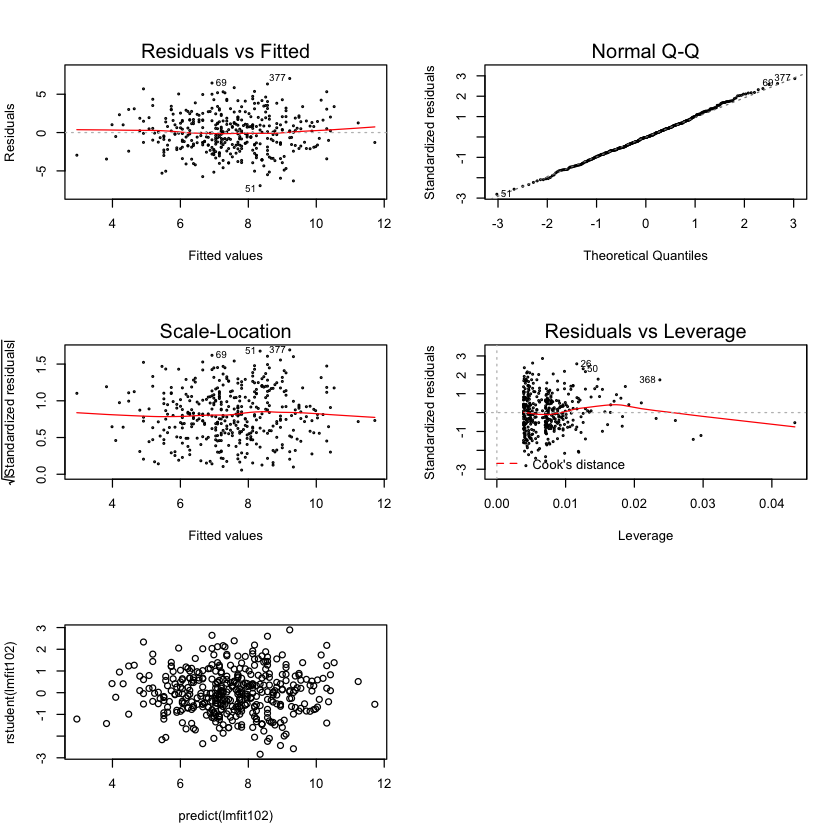

In [10]:
##10.h
par(mfrow=c(3,2))
plot(lmfit102, cex=0.3)
plot(predict(lmfit102), rstudent(lmfit102))
##leverage statisitcs (p+1)n
p<-2
n<-400
(p+1)/n

### 10.h
(a) the plot of Rstudentized residuals show that their are within [-3,3],so outliers.

(b) the Residuals vs Leverage plot shows a high number of  points with greater than Cooks distance (p+1)/n. 
Points with a large leverage distance with higher residuals are  more dangerous.(indexes 26,50,368)

## ex 11

In this problem we will investigate the t-statistic for the null hypothesis H0 in a simple linear regression without an intercept.

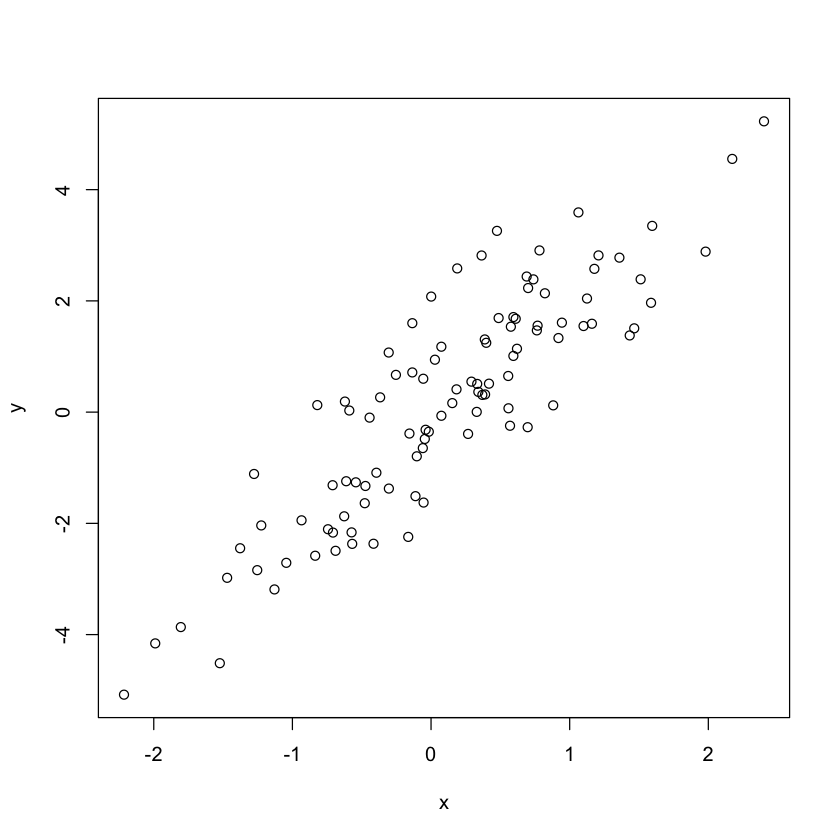

In [31]:
set.seed(1)
x=rnorm(100)
y<-2*x+rnorm(100)
plot(y~x)

In [32]:
#11.a
lmfit111<-lm(y~x+0) #without an intercept
summary(lmfit111)


Call:
lm(formula = y ~ x + 0)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9154 -0.6472 -0.1771  0.5056  2.3109 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
x   1.9939     0.1065   18.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9586 on 99 degrees of freedom
Multiple R-squared:  0.7798,	Adjusted R-squared:  0.7776 
F-statistic: 350.7 on 1 and 99 DF,  p-value: < 2.2e-16


#### 11(a)

Coef estimate 1.99 its std err = 0.106, is t-statistics 18.73 and p-value is 2 E(-16)

The liniear model has a high f-statistics and a high R squared at 0.77 suggesting that the model fits the data well

In [33]:
#11.b
lmfit112<-lm(x~y+0) #without an intercept
summary(lmfit112)


Call:
lm(formula = x ~ y + 0)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8699 -0.2368  0.1030  0.2858  0.8938 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
y  0.39111    0.02089   18.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4246 on 99 degrees of freedom
Multiple R-squared:  0.7798,	Adjusted R-squared:  0.7776 
F-statistic: 350.7 on 1 and 99 DF,  p-value: < 2.2e-16


#### 11(b)

Fitting x onto y produces a model with the same degree of accuracy as  y=f(x)

### 11(c)

An inverse relationship is suggested

$y = 2 x + \epsilon$

$x = \frac{1}{2}(y - \epsilon)$

### 11(d)
is done by hand on in ISLEX1
We can prove that t-statistic is
$$tstat = \frac{(\sqrt{n-1})\sum_{i=1}^n x_i y_i }
                 {\sqrt{\sum_{i=1}^n x_i^2 \sum_{i'=1}^n y_{i'}^2
                  - \left(\sum_{i=1'}^n x_{i'} y_{i'}\right)^2 }}$$

### 11.(e)
lm(y~x) and lm(y~x) has the equal t-statistics because in the above formula the variable substituion of y by x and x by y yield the same result.

### 11(f)

In [39]:
lmfit113<-lm(x~y)
lmfit114<-lm(y~x)
summary(lmfit113)$coefficients
summary(lmfit114)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.03880394,0.04266144,0.9095787,3.652764e-01
y,0.38942451,0.02098690,18.5555993,7.723851e-34


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-0.03769261,0.09698729,-0.3886346,6.983896e-01
x,1.99893961,0.10772703,18.5555993,7.723851e-34


As we can see the t-value for coefficients  for y and x are the same

## Ex 12

#### 12.a
If 
$$ \hat{\beta} = \left( \sum_{i=1}^n x_i y_i \right) / 
     \left( \sum_{i'=1}^n x_{i'}^2 \right) $$
     
The coefficient estimate $\beta$ will be the same for both regression X onto Y and Y and X  if 
$ \sum_{i=1}^n x_{i}^2 = \sum_{i=1}^n y_{i}^2 $

In [70]:
##12.b
set.seed(1)
x=rnorm(100)
y<-2*x+runif(100)
print(summary(lm(y~x-1))$coefficients)
print(summary(lm(x~y-1))$coefficients)

  Estimate Std. Error  t value     Pr(>|t|)
x 2.083889 0.05697168 36.57763 2.565618e-59
   Estimate Std. Error  t value     Pr(>|t|)
y 0.4468101 0.01221539 36.57763 2.565618e-59


In [83]:
##12.c 
set.seed(1)
x=rnorm(100)
y=rnorm(100) # y is drawn from the same distibution as x 
print(summary(lm(y~x-1))$coefficients)
print(summary(lm(x~y-1))$coefficients)

      Estimate Std. Error     t value  Pr(>|t|)
x -0.006123917  0.1064767 -0.05751413 0.9542516
      Estimate Std. Error     t value  Pr(>|t|)
y -0.005455947 0.09486272 -0.05751413 0.9542516


## Ex 13

In [71]:
## 13.a
set.seed(1)
x<-rnorm(100, mean=0, sd=1) #default values

In [72]:
##13.b
eps<-rnorm(100, mean=0, sd=0.25) #residuals with smaller variance

In [73]:
##13.c
y<- -1+0.5*x + eps

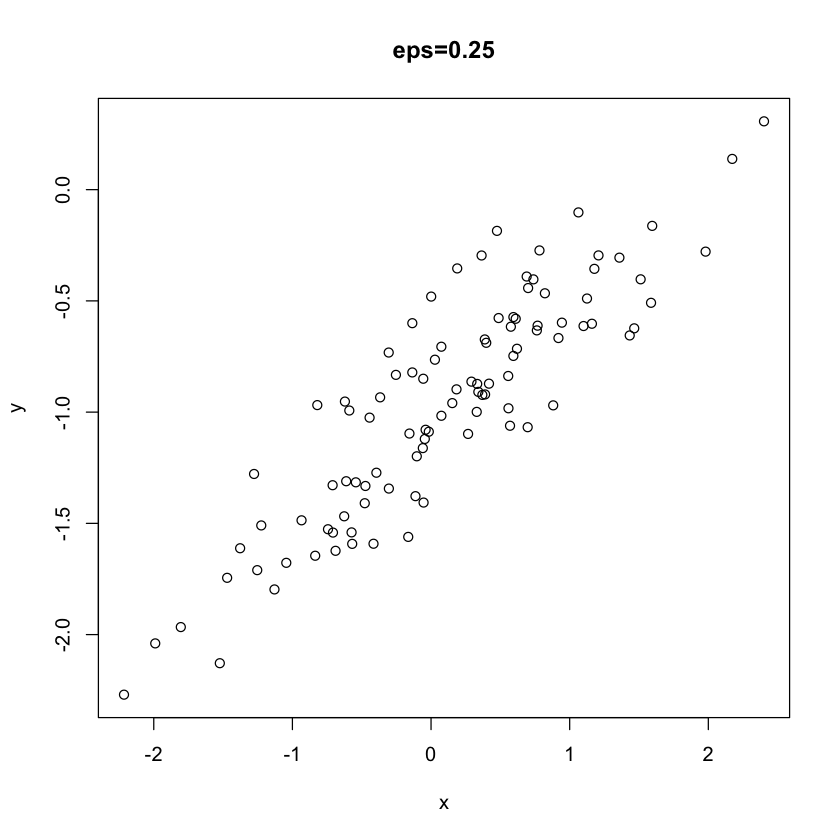

In [74]:
#13(d)
plot(y~x, main="eps=0.25")

In [75]:
##13.e
#e)
lmfit131<-lm(y~x)
print(summary(lmfit131))


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.46921 -0.15344 -0.03487  0.13485  0.58654 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.00942    0.02425  -41.63   <2e-16 ***
x            0.49973    0.02693   18.56   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2407 on 98 degrees of freedom
Multiple R-squared:  0.7784,	Adjusted R-squared:  0.7762 
F-statistic: 344.3 on 1 and 98 DF,  p-value: < 2.2e-16



#### 13.e
The model fits the data well,  hight F-statistics,  low p-value

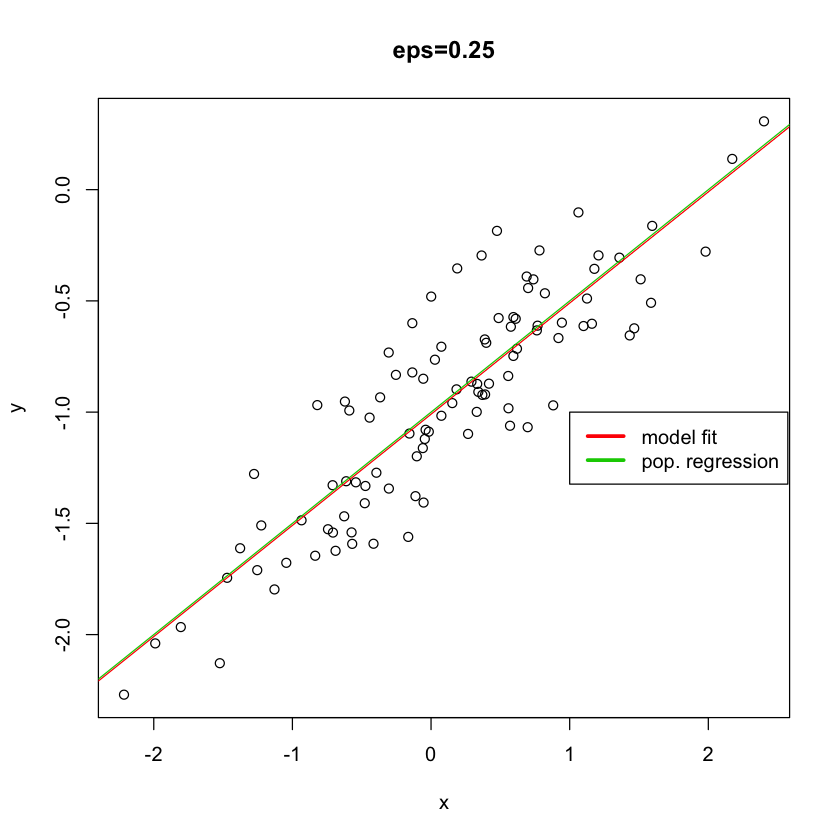

In [76]:
#13.f
plot(y~x, main="eps=0.25")
abline(lmfit131, col=2)
abline(-1, 0.5, col=3)
legend(-1, legend=c("model fit", "pop. regression"),col=2:3,lwd=3 )

#### 13.f 
We observe that the linear model fit and the population regression lines are very close

In [82]:
### 13.g
lmfit132<-lm(y~x+I(x^2))
print(summary(lmfit132))



Call:
lm(formula = y ~ x + I(x^2))

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4913 -0.1563 -0.0322  0.1451  0.5675 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.98582    0.02941 -33.516   <2e-16 ***
x            0.50429    0.02700  18.680   <2e-16 ***
I(x^2)      -0.02973    0.02119  -1.403    0.164    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2395 on 97 degrees of freedom
Multiple R-squared:  0.7828,	Adjusted R-squared:  0.7784 
F-statistic: 174.8 on 2 and 97 DF,  p-value: < 2.2e-16



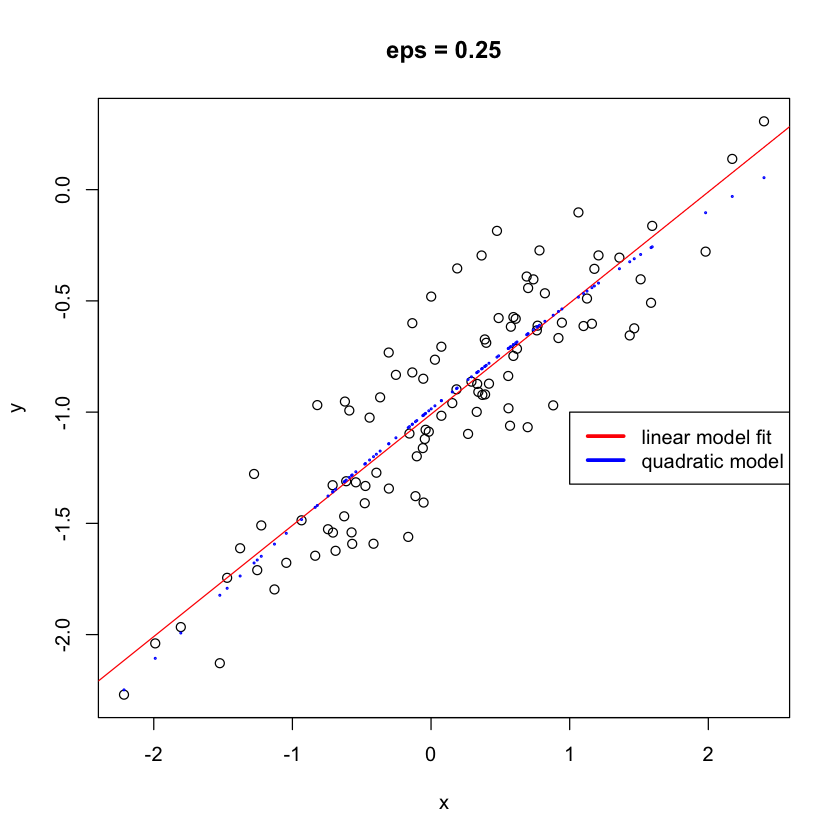

In [78]:
plot(y~x, main="eps = 0.25")
abline(lmfit131, col=2)
points(x,predict(lmfit132, data.frame(x)) ,col=4, cex=0.2)
legend(-1, legend=c("linear model fit", "quadratic model fit"),col=c(2,4),lwd=3 )

#### 13.g  
We observe a lower F-statistic  in quadratic regression compared to linear one. And a slight decrease in RSE And a slight increase R squared. The quadratic model fits data a bit better than  linear model.


Call:
lm(formula = yb ~ x)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.291411 -0.048230 -0.004533  0.064924  0.264157 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.99726    0.01047  -95.25   <2e-16 ***
x            0.50212    0.01163   43.17   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1039 on 98 degrees of freedom
Multiple R-squared:  0.9501,	Adjusted R-squared:  0.9495 
F-statistic:  1864 on 1 and 98 DF,  p-value: < 2.2e-16



Call:
lm(formula = yb ~ x + I(x^2))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.292742 -0.049523 -0.003585  0.065955  0.264542 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.995887   0.012828 -77.637   <2e-16 ***
x            0.502382   0.011773  42.673   <2e-16 ***
I(x^2)      -0.001734   0.009242  -0.188    0.852    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1045 on 97 degrees of freedom
Multiple R-squared:  0.9501,	Adjusted R-squared:  0.949 
F-statistic: 922.9 on 2 and 97 DF,  p-value: < 2.2e-16


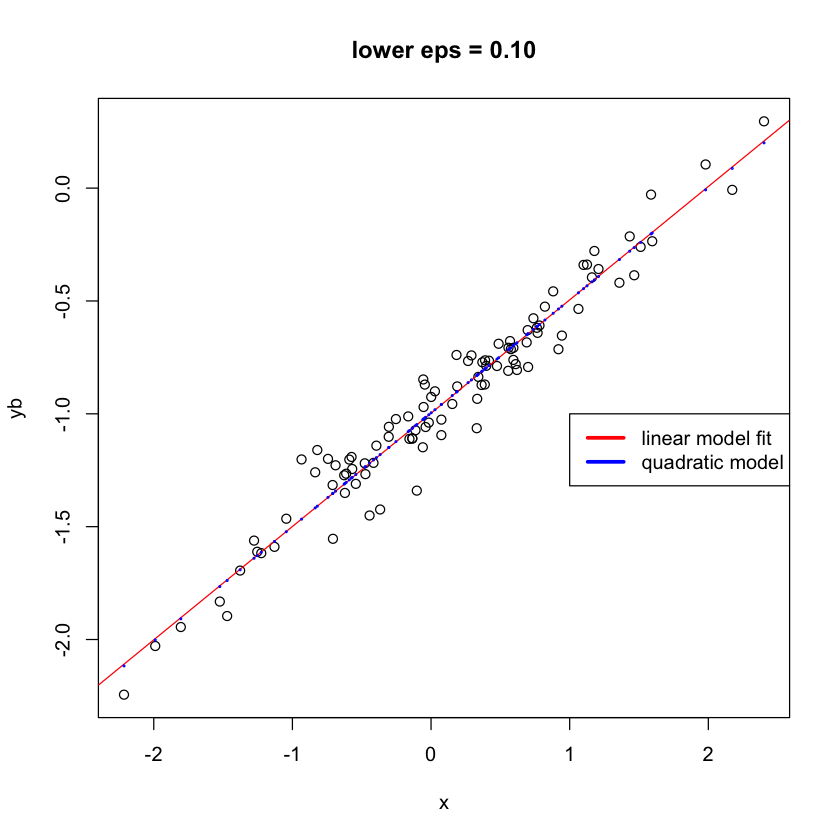

In [79]:
##13.h 
epsb<-rnorm(100, mean=0, sd=0.10) #residuals with smaller varianc
yb<- -1+0.5*x + epsb
lmfit133<-lm(yb~x)
lmfit134<-lm(yb~x+I(x^2))

summary(lmfit133)
summary(lmfit134)

plot(yb~x, main="lower eps = 0.10")
abline(lmfit133, col=2)
points(x,predict(lmfit134, data.frame(x)) ,col=4, cex=0.2)
legend(-1, legend=c("linear model fit", "quadratic model fit"),col=c(2,4),lwd=3 )


### 13.h
With lower variance in residuals  we observe linear and quadratic fits with higher F-statistics. The quadratic fits as previously fits the data a little better compared to the linear model


Call:
lm(formula = ybb ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0065 -0.2181 -0.0151  0.2692  0.7516 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.97693    0.04011  -24.36   <2e-16 ***
x            0.47773    0.04455   10.72   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3982 on 98 degrees of freedom
Multiple R-squared:  0.5398,	Adjusted R-squared:  0.5351 
F-statistic:   115 on 1 and 98 DF,  p-value: < 2.2e-16



Call:
lm(formula = ybb ~ x + I(x^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.96057 -0.24405 -0.02417  0.27772  0.74931 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.91679    0.04798 -19.108   <2e-16 ***
x            0.48933    0.04403  11.113   <2e-16 ***
I(x^2)      -0.07576    0.03457  -2.192   0.0308 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3907 on 97 degrees of freedom
Multiple R-squared:  0.5616,	Adjusted R-squared:  0.5525 
F-statistic: 62.12 on 2 and 97 DF,  p-value: < 2.2e-16


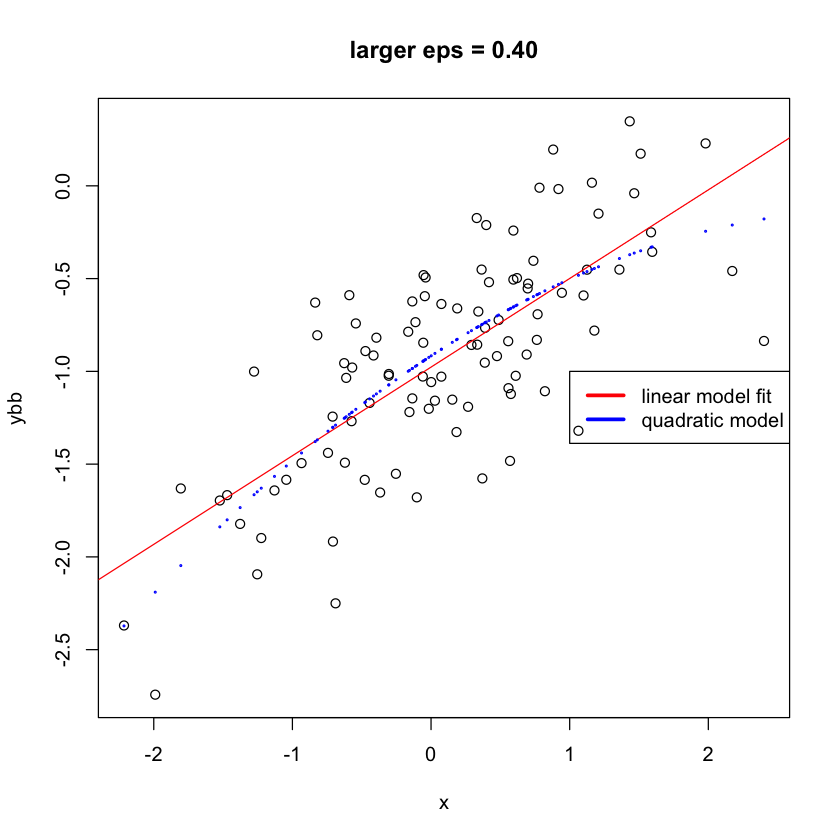

In [80]:
## 13.i 
epsbb<-rnorm(100, mean=0, sd=0.40) #residuals with larger variance
ybb<- -1+0.5*x + epsbb
lmfit135<-lm(ybb~x)
lmfit136<-lm(ybb~x+I(x^2))

summary(lmfit135)
summary(lmfit136)

plot(ybb~x, main="larger eps = 0.40")
abline(lmfit135, col=2)
points(x,predict(lmfit136, data.frame(x)) ,col=4, cex=0.2)
legend(-1, legend=c("linear model fit", "quadratic model fit"),col=c(2,4),lwd=3 )

### 13.i
With higher variance in residuals  we observe linear and quadratic fits with lower F-statistics. The quadratic fit as previously fits the data similarly compared to the linear model. F-statistis is lower.

In [81]:
#13.j 
confint(lmfit131) #ref eps
confint(lmfit133) #smaller eps
confint(lmfit133) #larger eps

paste("x interval length eps ref:", confint(lmfit131)[2,2] - confint(lmfit131)[2,1]  )
paste("x interval length eps smaller:", confint(lmfit133)[2,2] - confint(lmfit133)[2,1]  )
paste("x interval length eps larger:", confint(lmfit135)[2,2] - confint(lmfit135)[2,1]  )



,2.5 %,97.5 %
(Intercept),-1.0575402,-0.9613061
x,0.4462897,0.5531801


,2.5 %,97.5 %
(Intercept),-1.0180413,-0.9764850
x,0.4790377,0.5251957


,2.5 %,97.5 %
(Intercept),-1.0180413,-0.9764850
x,0.4790377,0.5251957


[1] "x interval length eps ref: 0.1068903933376"

[1] "x interval length eps smaller: 0.0461579857061538"

[1] "x interval length eps larger: 0.176833486631486"

#### 13.4
As expected  smaller variance of residuals makes a confidence intervals smaller i.e. coefficient estimation is more precise.  and vice versa.

## Ex 14

#### 14.a

In [5]:
set.seed(1)
x1<-runif(100)
x2 <- 0.5*x1 + rnorm(100)/10
y <-  2+2*x1 +0.3*x2+rnorm(100)


The the linear model $y =  2.0 + 2*x1 + 0.3*x2 + \epsilon$

The coefficients for x1: 2 , for x2: 0.2

#### 14.b

[1] 0.8351212

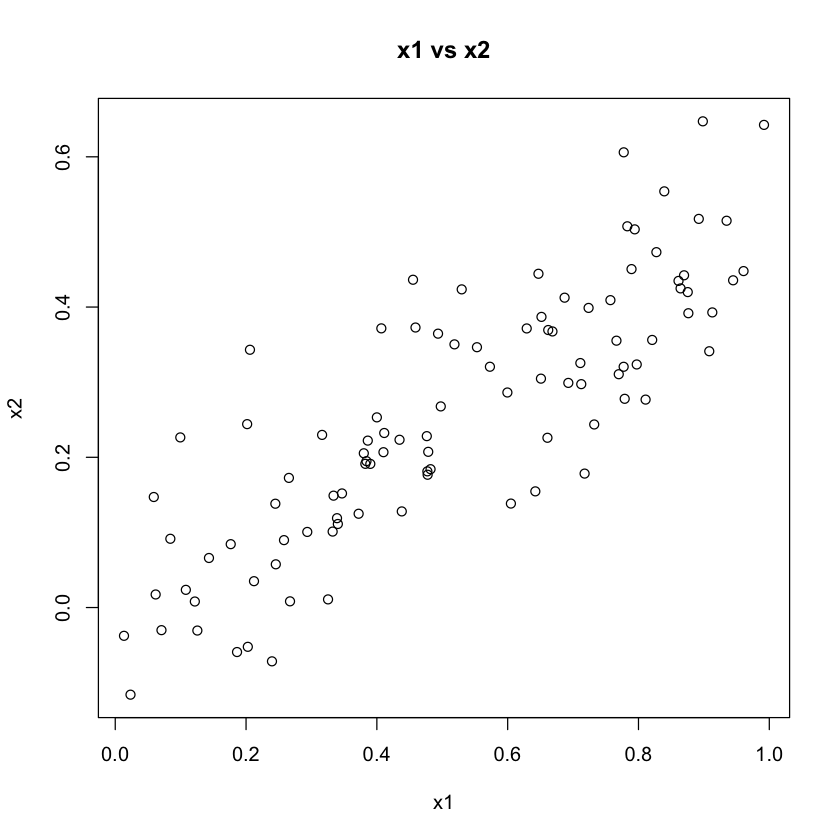

In [7]:
cor(x1,x2) # 0.835  the correlation is high
plot(x1,x2, main="x1 vs x2") # we observe correlated values

#### 14.c

In [8]:
lmfit141<-lm(y~x1+x2)
summary(lmfit141)


Call:
lm(formula = y ~ x1 + x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8311 -0.7273 -0.0537  0.6338  2.3359 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.1305     0.2319   9.188 7.61e-15 ***
x1            1.4396     0.7212   1.996   0.0487 *  
x2            1.0097     1.1337   0.891   0.3754    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.056 on 97 degrees of freedom
Multiple R-squared:  0.2088,	Adjusted R-squared:  0.1925 
F-statistic:  12.8 on 2 and 97 DF,  p-value: 1.164e-05


A linear regression model has an F-statistic 12.8 and a low p-value. 

Estimates of coefficients $\hat\beta_0, \hat\beta_1, \hat\beta_2$ : 2.13, 1.43, 1.0 

For $\beta_0$ estimate relates well. There is a bigger diference for $\beta_1$ and  for $\beta_2$ the estimate is event more  different.

For x1 p-value = 0.04 It is small enough so we can reject the null hypothesis $H_0: \beta_1 = 0$.

For x2 p-value = 0.37 It is large so we cannot reject the null hypothesis $H_0: \beta_2 = 0$.



#### 14.d

In [11]:
lmfit142<-lm(y~x1)
summary(lmfit142)


Call:
lm(formula = y ~ x1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.89495 -0.66874 -0.07785  0.59221  2.45560 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.1124     0.2307   9.155 8.27e-15 ***
x1            1.9759     0.3963   4.986 2.66e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.055 on 98 degrees of freedom
Multiple R-squared:  0.2024,	Adjusted R-squared:  0.1942 
F-statistic: 24.86 on 1 and 98 DF,  p-value: 2.661e-06


Now the coefficient estimate of x1 is much closer to its real value 2.0

Given its small p-value we can reject the null hypo $H_0: \beta_1 = 0$.

#### 14.e

In [12]:
lmfit143<-lm(y~x2)
summary(lmfit143)


Call:
lm(formula = y ~ x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.62687 -0.75156 -0.03598  0.72383  2.44890 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.3899     0.1949   12.26  < 2e-16 ***
x2            2.8996     0.6330    4.58 1.37e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.072 on 98 degrees of freedom
Multiple R-squared:  0.1763,	Adjusted R-squared:  0.1679 
F-statistic: 20.98 on 1 and 98 DF,  p-value: 1.366e-05


Given the small p-value we can reject the null hypo $H_0: \beta_2 = 0$.

#### 14.f
The results in c and e do not contradict each other as they come from two distinct linear regression model.  They point to a correlation between x1 and x2 data  and a potential collinearity between them

#### 14.g

In [18]:
## add additional data point
x1 <- c(x1, 0.1)
x2 <- c(x2, 0.8) #this is an outlier
y  <- c(y, 6) 

## Ex 3.15

This problem involves the Boston data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

(a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

(b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

(c) How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regres- sion model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.
(d) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form

$$Y = \beta_0 +\beta_1X +\beta_2X^2 +\beta_3X^3 +\epsilon$$


In [2]:
library(MASS)
str(Boston)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


### 15.a

In [11]:
##convert chas variable to a factor
Boston$chas <- factor(Boston$chas, labels = c("N","Y"))

# running single predictor linear regression model on all variables except response itself
print(paste(names(Boston)[-1], collapse=" "))

[1] "zn indus chas nox rm age dis rad tax ptratio black lstat medv"


In [12]:
##########################
# 'zn' proportion of residential land zoned for lots over 25,000 sq.ft.
lm_zn<-lm(crim~zn,data=Boston)
print(summary(lm_zn)) #### p-value low. linear model statistically significant but rsq very low 3.8% 



Call:
lm(formula = crim ~ zn, data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-4.429 -4.222 -2.620  1.250 84.523 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.45369    0.41722  10.675  < 2e-16 ***
zn          -0.07393    0.01609  -4.594 5.51e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.435 on 504 degrees of freedom
Multiple R-squared:  0.04019,	Adjusted R-squared:  0.03828 
F-statistic:  21.1 on 1 and 504 DF,  p-value: 5.506e-06



In [13]:
# 'indus' proportion of non-retail business acres per town.
lm_indus<-lm(crim~indus,data=Boston)
print(summary(lm_indus))   ### p-value low, lm significant, rsq = 0.163 


Call:
lm(formula = crim ~ indus, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.972  -2.698  -0.736   0.712  81.813 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.06374    0.66723  -3.093  0.00209 ** 
indus        0.50978    0.05102   9.991  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.866 on 504 degrees of freedom
Multiple R-squared:  0.1653,	Adjusted R-squared:  0.1637 
F-statistic: 99.82 on 1 and 504 DF,  p-value: < 2.2e-16



In [14]:
#'chas' Charles River dummy variable 
lm_chas<-lm(crim~chas,data=Boston)
print(summary(lm_chas))  ##### p-value high, lm non sig


Call:
lm(formula = crim ~ chas, data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-3.738 -3.661 -3.435  0.018 85.232 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.7444     0.3961   9.453   <2e-16 ***
chasY        -1.8928     1.5061  -1.257    0.209    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.597 on 504 degrees of freedom
Multiple R-squared:  0.003124,	Adjusted R-squared:  0.001146 
F-statistic: 1.579 on 1 and 504 DF,  p-value: 0.2094



In [15]:
#'nox' nitrogen oxides concentration
lm_nox<-lm(crim~nox,data=Boston)
print(summary(lm_nox)) ##### p-value low, lm sig, rsq = 0.17


Call:
lm(formula = crim ~ nox, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.371  -2.738  -0.974   0.559  81.728 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -13.720      1.699  -8.073 5.08e-15 ***
nox           31.249      2.999  10.419  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.81 on 504 degrees of freedom
Multiple R-squared:  0.1772,	Adjusted R-squared:  0.1756 
F-statistic: 108.6 on 1 and 504 DF,  p-value: < 2.2e-16



In [16]:
#'rm' average number of rooms per dwelling.
lm_rm<-lm(crim~rm,data=Boston)
print(summary(lm_rm)) # p-val ok lm sig, rsq=0.046


Call:
lm(formula = crim ~ rm, data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-6.604 -3.952 -2.654  0.989 87.197 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   20.482      3.365   6.088 2.27e-09 ***
rm            -2.684      0.532  -5.045 6.35e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.401 on 504 degrees of freedom
Multiple R-squared:  0.04807,	Adjusted R-squared:  0.04618 
F-statistic: 25.45 on 1 and 504 DF,  p-value: 6.347e-07



In [17]:
#'age' proportion of owner-occupied units built prior to 1940.
lm_age<-lm(crim~age,data=Boston)
print(summary(lm_age))  ##### p-value ok, lm sig, rsq=0.12


Call:
lm(formula = crim ~ age, data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-6.789 -4.257 -1.230  1.527 82.849 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.77791    0.94398  -4.002 7.22e-05 ***
age          0.10779    0.01274   8.463 2.85e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.057 on 504 degrees of freedom
Multiple R-squared:  0.1244,	Adjusted R-squared:  0.1227 
F-statistic: 71.62 on 1 and 504 DF,  p-value: 2.855e-16



In [18]:
#     'dis' weighted mean of distances to five Boston employmet centres.
lm_dis<-lm(crim~dis,data=Boston)
print(summary(lm_dis)) ###  p-val ok, lm sig, rsq=0.14


Call:
lm(formula = crim ~ dis, data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-6.708 -4.134 -1.527  1.516 81.674 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.4993     0.7304  13.006   <2e-16 ***
dis          -1.5509     0.1683  -9.213   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.965 on 504 degrees of freedom
Multiple R-squared:  0.1441,	Adjusted R-squared:  0.1425 
F-statistic: 84.89 on 1 and 504 DF,  p-value: < 2.2e-16



In [19]:
#'rad' index of accessibility to radial highways.
lm_rad<-lm(crim~rad,data=Boston)
print(summary(lm_rad)) #### p-val ok, lm sig  rsq = 0.39 !!!! 


Call:
lm(formula = crim ~ rad, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.164  -1.381  -0.141   0.660  76.433 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.28716    0.44348  -5.157 3.61e-07 ***
rad          0.61791    0.03433  17.998  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.718 on 504 degrees of freedom
Multiple R-squared:  0.3913,	Adjusted R-squared:   0.39 
F-statistic: 323.9 on 1 and 504 DF,  p-value: < 2.2e-16



In [20]:
#'tax' full-value property-tax rate per \$10,000.
lm_tax<-lm(crim~tax,data=Boston)
print(summary(lm_tax)) ### p-val ok, lm sig , rsq 0.338 !!!


Call:
lm(formula = crim ~ tax, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.513  -2.738  -0.194   1.065  77.696 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8.528369   0.815809  -10.45   <2e-16 ***
tax          0.029742   0.001847   16.10   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.997 on 504 degrees of freedom
Multiple R-squared:  0.3396,	Adjusted R-squared:  0.3383 
F-statistic: 259.2 on 1 and 504 DF,  p-value: < 2.2e-16



In [21]:
#'ptratio' pupil-teacher ratio by town.
lm_ptratio<-lm(crim~ptratio,data=Boston)
print(summary(lm_ptratio)) ### p-val ok, lm sig  rsq = 0.08


Call:
lm(formula = crim ~ ptratio, data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-7.654 -3.985 -1.912  1.825 83.353 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.6469     3.1473  -5.607 3.40e-08 ***
ptratio       1.1520     0.1694   6.801 2.94e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.24 on 504 degrees of freedom
Multiple R-squared:  0.08407,	Adjusted R-squared:  0.08225 
F-statistic: 46.26 on 1 and 504 DF,  p-value: 2.943e-11



In [22]:
#'black' 1000(Bk - 0.63)^2 where Bk is the proportion of blacks bytown.
lm_black<-lm(crim~black,data=Boston)
print(summary(lm_black))  ### p-val ok, lm sig, rsq = 0.14 !!


Call:
lm(formula = crim ~ black, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.756  -2.299  -2.095  -1.296  86.822 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 16.553529   1.425903  11.609   <2e-16 ***
black       -0.036280   0.003873  -9.367   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.946 on 504 degrees of freedom
Multiple R-squared:  0.1483,	Adjusted R-squared:  0.1466 
F-statistic: 87.74 on 1 and 504 DF,  p-value: < 2.2e-16



In [23]:
#'lstat' lower status of the population (percent).
lm_lstat<-lm(crim~lstat,data=Boston)
print(summary(lm_lstat))  ### p-val ok, lm sig, rsq = 0.2 !!!


Call:
lm(formula = crim ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.925  -2.822  -0.664   1.079  82.862 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.33054    0.69376  -4.801 2.09e-06 ***
lstat        0.54880    0.04776  11.491  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.664 on 504 degrees of freedom
Multiple R-squared:  0.2076,	Adjusted R-squared:  0.206 
F-statistic:   132 on 1 and 504 DF,  p-value: < 2.2e-16



In [24]:
#'medv' median value of owner-occupied homes in \$1000s.
lm_medv<-lm(crim~medv,data=Boston)
print(summary(lm_medv)) #### p-val ok, lm sig,  rsq=0.149 !!!


Call:
lm(formula = crim ~ medv, data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-9.071 -4.022 -2.343  1.298 80.957 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.79654    0.93419   12.63   <2e-16 ***
medv        -0.36316    0.03839   -9.46   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.934 on 504 degrees of freedom
Multiple R-squared:  0.1508,	Adjusted R-squared:  0.1491 
F-statistic: 89.49 on 1 and 504 DF,  p-value: < 2.2e-16



**15.(a)** In summary liner models are statistically significant with all but one predictor
(chas)

Predictors producing the highest percengages of the response variance explained are:
(rad, tax,black,lstat,medv)


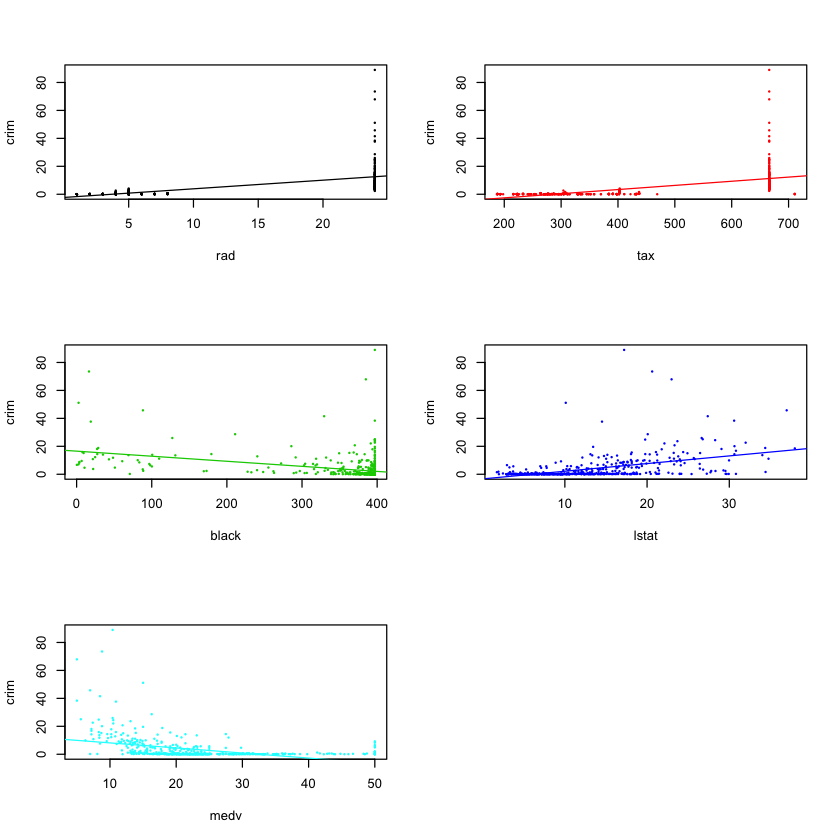

In [26]:
### plot of predictors with highest relation

par(mfrow=c(3,2))
plot(crim~rad, data=Boston, cex=0.2, col=1)
abline(lm_rad, col=1)

plot(crim~tax, data=Boston, cex=0.2, col=2)
abline(lm_tax, col=2)

plot(crim~black, data=Boston, cex=0.2, col=3)
abline(lm_black, col=3)

plot(crim~lstat, data=Boston, cex=0.2, col=4)
abline(lm_lstat, col=4)

plot(crim~medv, data=Boston, cex=0.2, col=5)
abline(lm_medv, col=5)

### 15.b

In [27]:
## linear model using all predictors
lm_15b<-lm(crim~., data=Boston)
print(summary(lm_15b))


Call:
lm(formula = crim ~ ., data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-9.924 -2.120 -0.353  1.019 75.051 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  17.033228   7.234903   2.354 0.018949 *  
zn            0.044855   0.018734   2.394 0.017025 *  
indus        -0.063855   0.083407  -0.766 0.444294    
chasY        -0.749134   1.180147  -0.635 0.525867    
nox         -10.313535   5.275536  -1.955 0.051152 .  
rm            0.430131   0.612830   0.702 0.483089    
age           0.001452   0.017925   0.081 0.935488    
dis          -0.987176   0.281817  -3.503 0.000502 ***
rad           0.588209   0.088049   6.680 6.46e-11 ***
tax          -0.003780   0.005156  -0.733 0.463793    
ptratio      -0.271081   0.186450  -1.454 0.146611    
black        -0.007538   0.003673  -2.052 0.040702 *  
lstat         0.126211   0.075725   1.667 0.096208 .  
medv         -0.198887   0.060516  -3.287 0.001087 ** 
---
Signif. codes:  0 ‘***’ 0.0

Running ** a multiple linear regression ** produces R-squared higher than for any single predictor linear regression. 

We can **reject null hypothesis** for predictors: {zn,dis,rad,black,medv}


In [28]:
lm_15bsig<-lm(crim~zn+dis+rad+black+medv,data=Boston)
print(summary(lm_15bsig))


Call:
lm(formula = crim ~ zn + dis + rad + black + medv, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.553  -1.869  -0.358   0.839  75.744 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.919933   1.778986   4.452 1.05e-05 ***
zn           0.051799   0.017329   2.989 0.002935 ** 
dis         -0.672189   0.202939  -3.312 0.000992 ***
rad          0.472306   0.042102  11.218  < 2e-16 ***
black       -0.008211   0.003615  -2.271 0.023562 *  
medv        -0.174219   0.036295  -4.800 2.10e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.473 on 500 degrees of freedom
Multiple R-squared:  0.4393,	Adjusted R-squared:  0.4337 
F-statistic: 78.34 on 5 and 500 DF,  p-value: < 2.2e-16



### 15.c

In [34]:
#construct y vec
coef_mult_reg <- lm_15b$coef[-1]
#coef_mult_reg
#construct x vec 
coef_singl_reg <- c(lm_zn$coef[-1], lm_indus$coef[-1], lm_chas$coef[-1], lm_nox$coef[-1], lm_rm$coef[-1],
            lm_age$coef[-1],  lm_dis$coef[-1], lm_rad$coef[-1],  lm_tax$coef[-1], lm_ptratio$coef[-1],
            lm_black$coef[-1], lm_lstat$coef[-1], lm_medv$coef[-1])
#coef_singl_reg

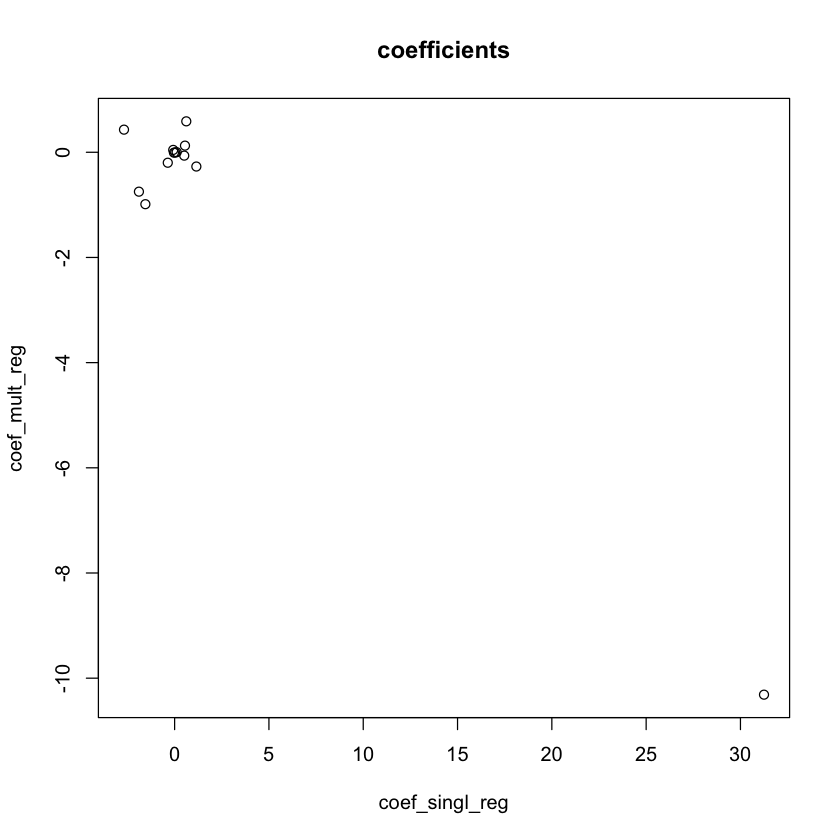

In [35]:
par(mfrow=c(1,1))
plot(coef_singl_reg, coef_mult_reg, main = "coefficients")

coefficient for nox is  -10 in multiple linear regression and 31 in single linear regression

### 15.(d)

In [39]:
predictors<-c('zn','indus','nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv')
print( paste(predictors, collapse=" ") )
for (p in predictors) {
  print(p)
  lm_p_q <- lm(crim~poly(eval(as.name(p)),3) , data=Boston  )
  print(summary(lm_p_q))
}


[1] "zn indus nox rm age dis rad tax ptratio black lstat medv"
[1] "zn"

Call:
lm(formula = crim ~ poly(eval(as.name(p)), 3), data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-4.821 -4.614 -1.294  0.473 84.130 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  3.6135     0.3722   9.709  < 2e-16 ***
poly(eval(as.name(p)), 3)1 -38.7498     8.3722  -4.628  4.7e-06 ***
poly(eval(as.name(p)), 3)2  23.9398     8.3722   2.859  0.00442 ** 
poly(eval(as.name(p)), 3)3 -10.0719     8.3722  -1.203  0.22954    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.372 on 502 degrees of freedom
Multiple R-squared:  0.05824,	Adjusted R-squared:  0.05261 
F-statistic: 10.35 on 3 and 502 DF,  p-value: 1.281e-06

[1] "indus"

Call:
lm(formula = crim ~ poly(eval(as.name(p)), 3), data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-8.278 -2.514  0.054  0.764 79.713 

Coefficients

As seen from the previous output evidence of non-linear associations for predictors: 

zn - non-linear 1,2,3,

indus - non-linear 1,2,3,  

chas - non quantitative(factor),

nox  non-linear 1,2,3,

rm non-linear 1,2,

age - non-linear 1,2,3

dis - non-linear , 

rad - non-linear 1,2,

tax - non-linear 1,2

ptratio - non-linear 1,2,3 ,

black linear 1,

lstat non-linear  1,2,

medv non -linear 1,2,3

